In [1]:
#importing necessary libraries for preprocessing and visualizationsand performance metrices
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from matplotlib import gridspec as gs

# importing libraries to split data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# To get different metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay,
    auc
)

In [2]:
#loading bank dataset
data= pd.read_csv('bank_data_train.csv')
data= data.sample(n=40000, random_state=42)

In [3]:
#getting the first 5 rows to get an overview.
data

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
244774,452708,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
219018,420351,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
312981,538077,1,0.009008,NaN,36.0,NaN,NaN,0.0,0.5,0.306885,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
282498,499947,0,0.000000,0.0,56.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
59643,221387,0,0.260814,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72524,237489,0,0.025346,NaN,77.0,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
51582,211333,0,0.000000,NaN,74.0,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
44364,202260,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0
6515,155060,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0


In [4]:
# fetching dataset info - no. of rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 244774 to 29177
Columns: 116 entries, ID to TARGET
dtypes: float64(94), int64(9), object(13)
memory usage: 35.7+ MB


In [5]:
#CHECKING FOR NULL VALUES
data.isna().sum()

ID                              0
CR_PROD_CNT_IL                  0
AMOUNT_RUB_CLO_PRC           4362
PRC_ACCEPTS_A_EMAIL_LINK    22651
APP_REGISTR_RGN_CODE        33211
                            ...  
TURNOVER_DYNAMIC_CC_3M          0
LDEAL_ACT_DAYS_PCT_TR       29568
LDEAL_ACT_DAYS_PCT_TR4      29568
LDEAL_ACT_DAYS_PCT_CURR     29568
TARGET                          0
Length: 116, dtype: int64

In [6]:
#Renaming columns for clarity
data = data.rename(columns={'AGE':'Age','APP_CAR':'Ownership','APP_COMP_TYPE':'Company_type','APP_DRIVING_LICENSE':'Driving_license','APP_EDUCATION':'Education','APP_EMP_TYPE':'Employment_type','APP_KIND_OF_PROP_HABITATION':'Habitation_property','APP_MARITAL_STATUS':'Marital_status','APP_POSITION_TYPE':'Position_type','APP_REGISTR_RGN_CODE':'Region_code','APP_TRAVEL_PASS':'International_passport','AVG_PCT_DEBT_TO_DEAL_AMT':'Debt_to_deal_amt','AVG_PCT_MONTH_TO_PCLOSE':'Percent_credit_left','CLNT_JOB_POSITION':'Job_position','CLNT_SALARY_VALUE':'Salary','CLNT_SETUP_TENOR':'Customer_months'})

In [7]:
data = data.rename(columns={'CLNT_TRUST_RELATION':'Trust_relation','PACK':'Service_package','REST_AVG_CUR':'Current_acc_balance','REST_AVG_PAYM':'Salary_acc_balance'})

In [8]:
#defining Target and features
X= data.drop('TARGET', axis=1) #features (drop the target column)
y= data['TARGET'] #target variable

In [9]:
X

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,Region_code,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,...,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR
244774,452708,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
219018,420351,0,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
312981,538077,1,0.009008,NaN,36.0,NaN,NaN,0.0,0.5,0.306885,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
282498,499947,0,0.000000,0.0,56.0,0.0,0.0,0.0,NaN,NaN,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59643,221387,0,0.260814,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72524,237489,0,0.025346,NaN,77.0,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
51582,211333,0,0.000000,NaN,74.0,NaN,NaN,0.0,NaN,NaN,...,0.016561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44364,202260,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
6515,155060,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [10]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
# Handling Null Values using Simple Imputer
from sklearn.impute import SimpleImputer

# Imputing numerical columns
n_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[n_columns] = imputer.fit_transform(X_train[n_columns])
X_test[n_columns] = imputer.transform(X_test[n_columns])

In [12]:
# Imputing categorical columns
c_columns = X_train.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
X_train[c_columns] = imputer.fit_transform(X_train[c_columns])
X_test[c_columns] = imputer.transform(X_test[c_columns])


In [13]:
#CHECKING FOR NULL VALUES
X_test.isna().sum()

ID                          0
CR_PROD_CNT_IL              0
AMOUNT_RUB_CLO_PRC          0
PRC_ACCEPTS_A_EMAIL_LINK    0
Region_code                 0
                           ..
LDEAL_DELINQ_PER_MAXYWZ     0
TURNOVER_DYNAMIC_CC_3M      0
LDEAL_ACT_DAYS_PCT_TR       0
LDEAL_ACT_DAYS_PCT_TR4      0
LDEAL_ACT_DAYS_PCT_CURR     0
Length: 115, dtype: int64

In [14]:
# Age to years conversion
if 'AGE' in X_train.columns:
    X_train['AGE'] = X_train['AGE'] / 12
    X_test['AGE'] = X_test['AGE'] / 12


In [15]:
#drop the above columns with 0.0 values
data.drop(['CNT_ACCEPTS_TK','CNT_ACCEPTS_MTP','PRC_ACCEPTS_A_EMAIL_LINK','PRC_ACCEPTS_A_POS','PRC_ACCEPTS_A_TK','PRC_ACCEPTS_A_AMOBILE','PRC_ACCEPTS_TK','PRC_ACCEPTS_A_MTP','PRC_ACCEPTS_A_ATM','PRC_ACCEPTS_MTP'],axis=1,inplace=True)

In [16]:
# Combine X_train and y_train to make a complete training DataFrame
data_train = pd.concat([X_train, y_train], axis=1)

In [17]:
# Label encoding for categorical features
categorical_columns = X_train.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X_train[col] = label_encoders[col].fit_transform(X_train[col])
    # Ensure all categories in test set were seen during training
    X_test[col] = X_test[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

In [18]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<Axes: >

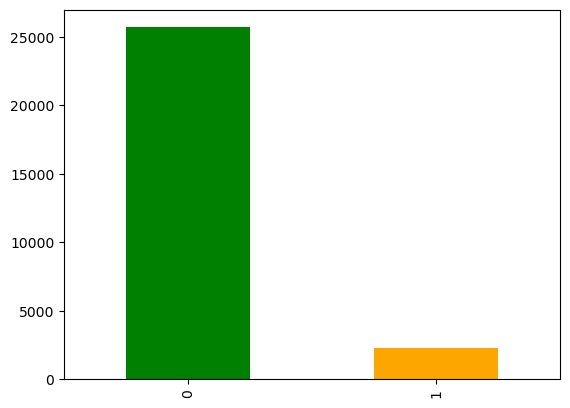

In [19]:
y_train.value_counts().plot(kind='bar', color=['green', 'orange'])

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# Resampling (only on the training set)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


<Axes: >

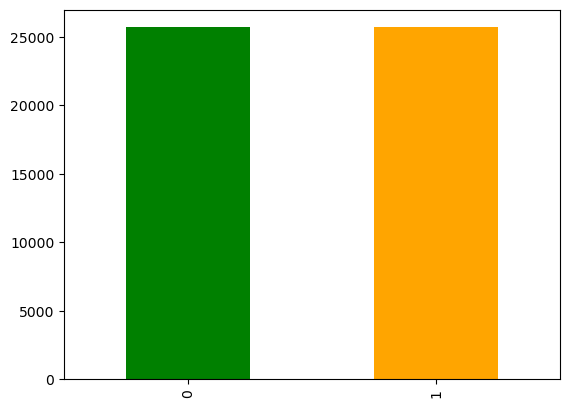

In [22]:
y_train_resampled.value_counts().plot(kind='bar', color=['green', 'orange'])

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train_resampled and y_train_resampled are your training features and labels
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Extract feature importances
importances = model.feature_importances_
feature_names = X_train_resampled.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train_resampled[top_features]
X_test_selected = X_test[top_features]


                     Feature  Importance
22       Current_acc_balance    0.065084
44       TRANS_COUNT_ATM_PRC    0.033290
83   SUM_TRAN_ATM_TENDENCY1M    0.032127
75   CNT_TRAN_ATM_TENDENCY1M    0.029853
77   SUM_TRAN_ATM_TENDENCY3M    0.025517
..                       ...         ...
3   PRC_ACCEPTS_A_EMAIL_LINK    0.000000
33         PRC_ACCEPTS_A_ATM    0.000000
14            PRC_ACCEPTS_TK    0.000000
18            CNT_ACCEPTS_TK    0.000000
15         PRC_ACCEPTS_A_MTP    0.000000

[115 rows x 2 columns]


In [24]:
X_train_selected.columns

Index(['Current_acc_balance', 'TRANS_COUNT_ATM_PRC', 'SUM_TRAN_ATM_TENDENCY1M',
       'CNT_TRAN_ATM_TENDENCY1M', 'SUM_TRAN_ATM_TENDENCY3M',
       'REST_DYNAMIC_CUR_1M', 'LDEAL_ACT_DAYS_PCT_CURR', 'Customer_months',
       'CNT_TRAN_ATM_TENDENCY3M', 'LDEAL_ACT_DAYS_PCT_TR4',
       'AMOUNT_RUB_ATM_PRC', 'MED_DEBT_PRC_YWZ', 'LDEAL_DELINQ_PER_MAXYWZ',
       'CNT_TRAN_MED_TENDENCY3M', 'ID', 'TURNOVER_DYNAMIC_CUR_1M',
       'TRANS_CNT_TENDENCY3M', 'CNT_TRAN_SUP_TENDENCY3M',
       'LDEAL_ACT_DAYS_PCT_TR', 'SUM_TRAN_CLO_TENDENCY3M'],
      dtype='object')

In [25]:
# Train the Random Forest model with selected features
rf_selected = RandomForestClassifier(n_estimators=50, random_state=22,max_leaf_nodes=9,max_depth=3)
rf_selected.fit(X_train_selected, y_train_resampled)

# Evaluate the model
accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

Accuracy after feature selection: 0.74


In [26]:
accuracy_after = rf_selected.score(X_train_selected,y_train_resampled)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

Accuracy after feature selection: 0.76


In [27]:
y_train_pred = rf_selected.predict(X_train_selected)
y_test_pred = rf_selected.predict(X_test_selected)

In [28]:
# Calculate performance metrics for training data
train_acc = accuracy_score(y_train_resampled, y_train_pred)
train_prec = precision_score(y_train_resampled, y_train_pred)
train_rec = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)


In [29]:
# Print the training and testing performance metrics
print("Training Accuracy: {:.2f}".format(train_acc))
print("Training Precision: {:.2f}".format(train_prec))
print("Training Recall: {:.2f}".format(train_rec))
print("Training F1-Score: {:.2f}".format(train_f1))


Training Accuracy: 0.76
Training Precision: 0.76
Training Recall: 0.76
Training F1-Score: 0.76


In [30]:
# Calculate performance metrics for testing data
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

In [31]:
print("\nTesting Accuracy: {:.2f}".format(test_acc))
print("Testing Precision: {:.2f}".format(test_prec))
print("Testing Recall: {:.2f}".format(test_rec))
print("Testing F1-Score: {:.2f}".format(test_f1))



Testing Accuracy: 0.74
Testing Precision: 0.15
Testing Recall: 0.48
Testing F1-Score: 0.23


# DNN Model

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [33]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [34]:
# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(data[categorical_columns])

In [35]:
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))

In [36]:
# Drop the original categorical columns and concatenate the encoded columns
data = data.drop(columns=categorical_columns)
data = pd.concat([data, encoded_categorical_df], axis=1)

In [37]:
print(data.head())


              ID  CR_PROD_CNT_IL  AMOUNT_RUB_CLO_PRC  Region_code  \
244774  452708.0             0.0            0.000000          NaN   
219018  420351.0             0.0            0.000000          NaN   
312981  538077.0             1.0            0.009008         36.0   
282498  499947.0             0.0            0.000000         56.0   
59643   221387.0             0.0            0.260814          NaN   

        TURNOVER_DYNAMIC_IL_1M  CNT_TRAN_AUT_TENDENCY1M  \
244774                     0.0                      NaN   
219018                     0.0                      NaN   
312981                     0.0                      0.5   
282498                     0.0                      NaN   
59643                      0.0                      NaN   

        SUM_TRAN_AUT_TENDENCY1M  AMOUNT_RUB_SUP_PRC  SUM_TRAN_AUT_TENDENCY3M  \
244774                      NaN            0.005205                      NaN   
219018                      NaN            0.000000                   

In [38]:
#implementing keras on the data
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential([
    Dense(units=32, activation='relu', input_dim=X_train.shape[1]),  
    Dense(units=16, activation='relu'),  
    Dense(units=1, activation='sigmoid') 
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Users/prabinawal/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Training the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 624us/step - accuracy: 0.7091 - loss: 10541.6475 - val_accuracy: 0.7607 - val_loss: 62.2059
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - accuracy: 0.8596 - loss: 82.8986 - val_accuracy: 0.8818 - val_loss: 63.3187
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.8568 - loss: 69.9194 - val_accuracy: 0.9150 - val_loss: 60.5687
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8554 - loss: 66.8445 - val_accuracy: 0.7350 - val_loss: 27.4434
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy: 0.8513 - loss: 60.0176 - val_accuracy: 0.9161 - val_loss: 108.7158
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.8626 - loss: 56.8335 - val_accuracy: 0.9161 - val_loss: 38.8284
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.8601 - loss: 42.6678 - val_accuracy: 0.9180 - val_loss: 77.4389
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.8561

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.8635 - loss: 12.1122
Deep Neural Network Results:
Loss: 12.598023414611816
Accuracy: 0.8669166564941406


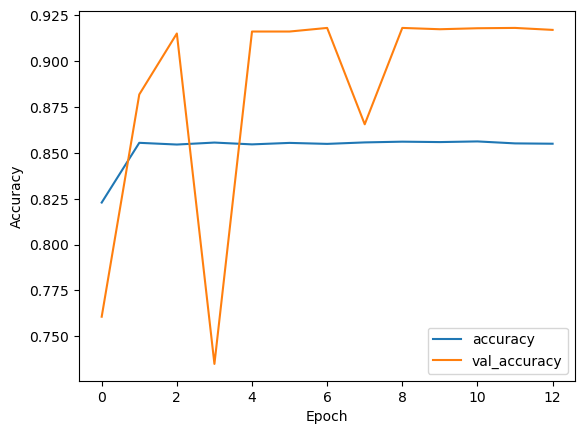

In [40]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)

# Displaying the results of DNN Model
print("Deep Neural Network Results:")
print("Loss:", loss)
print("Accuracy:", accuracy)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# Save the model
model.save('churn_model.h5')

In [42]:
from tensorflow.keras.models import load_model

# Load the trained DNN model
model = load_model('churn_model.h5')

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
# app.py

from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model

app = Flask(__name__)

# Load the trained DNN model
model = load_model('churn_model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    # Get data from the request
    data = request.json
    # Convert data to numpy array
    input_data = np.array(data['input'])
    # Make prediction
    prediction = model.predict(input_data)
    # Format prediction as JSON
    response = {'prediction': prediction.tolist()}
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/prabinawal/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/Users/prabinawal/anaconda3/lib/python3.10/site-packages/ipykernel/__init__.py", line 5, in <module>
    from .connect import *  # noqa
  File "/Users/prabinawal/anaconda3/lib/python3.10/site-packages/ipykernel/connect.py", line 11, in <module>
    import jupyter_client
  File "/Users/prabinawal/anaconda3/lib/python3.10/site-packages/jupyter_client/__init__.py", line 8, in <module>
    from .asynchronous import AsyncKernelClient  # noqa
  File "/Users/prabinawal/anaconda3/lib/python3.10/site-packages/jupyter_client/asynchronous/__init__.py",

SystemExit: 1

/Users/prabinawal/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3468: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
